# pandas的axis参数怎么理解

- axis=0或者'index'
    - 如果是单行操作，就指的是某一行
    - 如果是聚合操作，指的是跨行cross rows 
- axis=1或者'columns'
    - 如果是单列操作，指的是某一列
    - 如果是聚合操作，指的是跨列cross col按照哪个

**按照哪个axis，就是这个axis要动起来（类似被for遍历）其他的axis保持不变**

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(
    np.arange(12).reshape(3, 4),
    columns = ['A', 'B', 'C', 'D']
)

In [5]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


## 1 单列drop，删除某一列

In [6]:
df.drop('A', axis=1)

,B,C,D
0,1,2,3
1,5,6,7
2,9,10,11


## 2 单行drop，删除某一行

In [8]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [9]:
df.drop(1, axis=0)

,A,B,C,D
0,0,1,2,3
2,8,9,10,11


## 3 按axis=0/index执行mean聚合操作

反直觉，输出的不是每行的结果，而是每列的结果

In [10]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [11]:
df.mean(axis=0)

A    4.0
B    5.0
C    6.0
D    7.0
dtype: float64

**按照哪个axis，就是这个axis要动起来（类似被for遍历）其他的axis保持不变**

-----

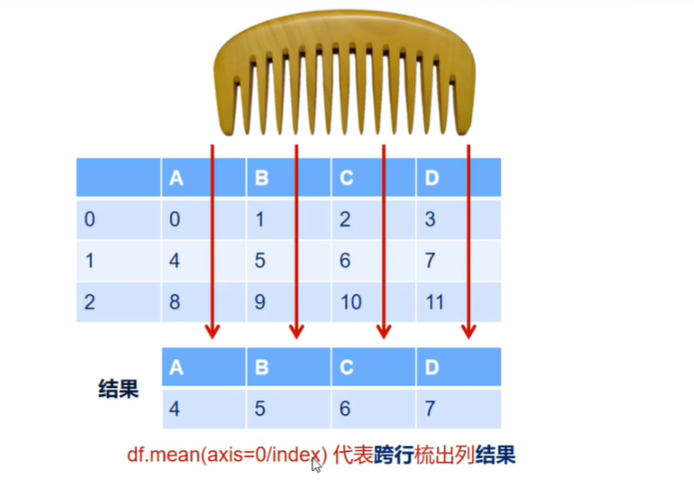

## 4 按照axis=1/columns执行mean聚合操作

In [12]:
df.mean(axis=1)

0    1.5
1    5.5
2    9.5
dtype: float64

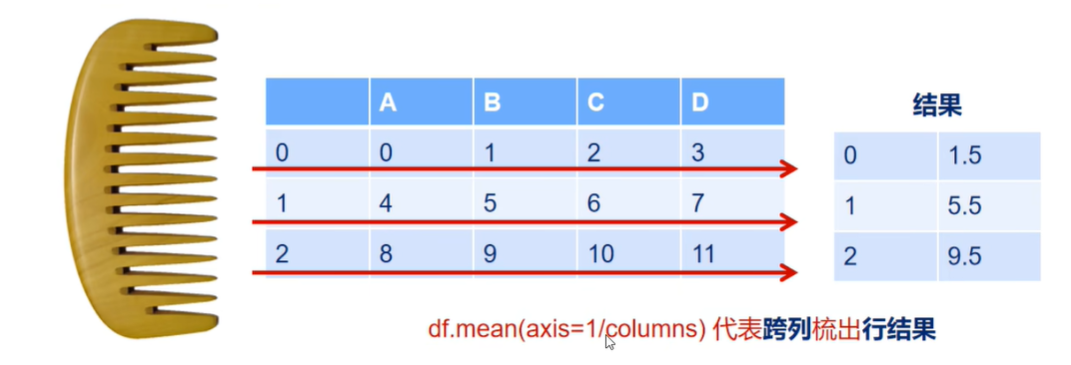

## 再次举例 加深理解

In [13]:
def get_sum_value(x):
    return x['A'] + x['B'] + x['C'] + x['D']

df['sum_value'] = df.apply(get_sum_value, axis=1)

In [14]:
df

,A,B,C,D,sum_value
0,0,1,2,3,6
1,4,5,6,7,22
2,8,9,10,11,38
